In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/genres_v2.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

## Kmeans technique (Mayank)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [ ]:
#dropping rows with no song names

df= df[df['song_name'].isnull() == False]
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN,NaN
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN,NaN
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN,NaN
21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,...,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On,NaN,NaN


In [ ]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,Hiphop,Born 2 Live
21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,188.760,Hiphop,Can't Hold On


<ipython-input-9-e89bf90b8bb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


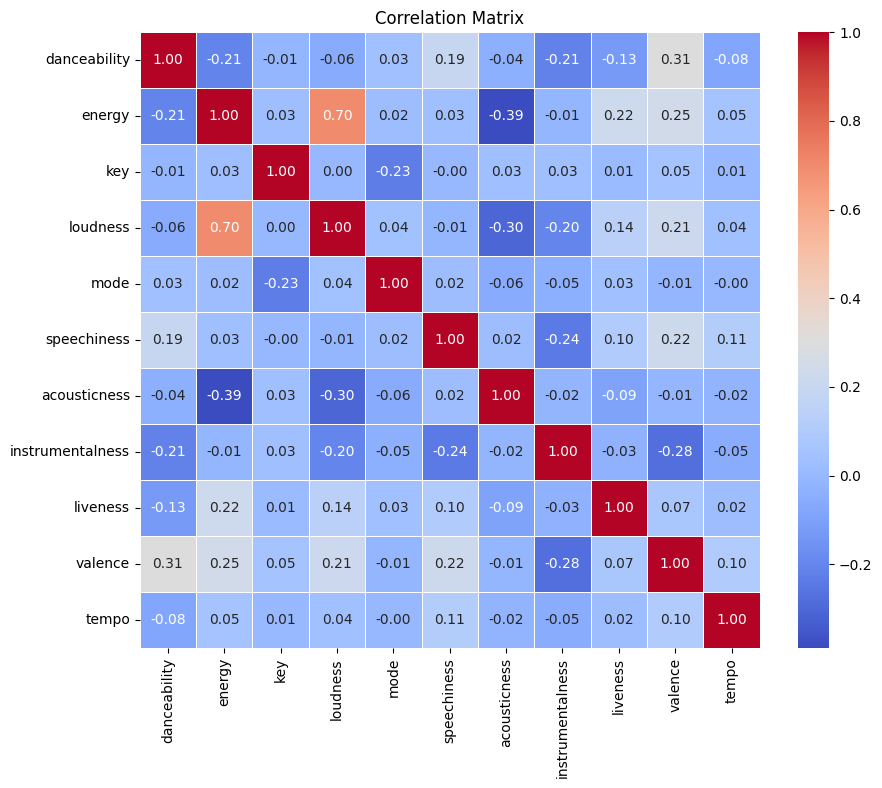

In [ ]:
correlation_matrix = filtered_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21519 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21519 non-null  float64
 1   energy            21519 non-null  float64
 2   key               21519 non-null  int64  
 3   loudness          21519 non-null  float64
 4   mode              21519 non-null  int64  
 5   speechiness       21519 non-null  float64
 6   acousticness      21519 non-null  float64
 7   instrumentalness  21519 non-null  float64
 8   liveness          21519 non-null  float64
 9   valence           21519 non-null  float64
 10  tempo             21519 non-null  float64
 11  genre             21519 non-null  object 
 12  song_name         21519 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df


<ipython-input-11-f8591e928cb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,song_name
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,Dark Trap,Mercury: Retrograde
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,Dark Trap,Pathology
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,Dark Trap,Symbiote
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,Hiphop,Daddy's Girl
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,Hiphop,'94
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,Hiphop,Born 2 Live
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,Hiphop,Can't Hold On


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-6ce1a4a0fc3f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)


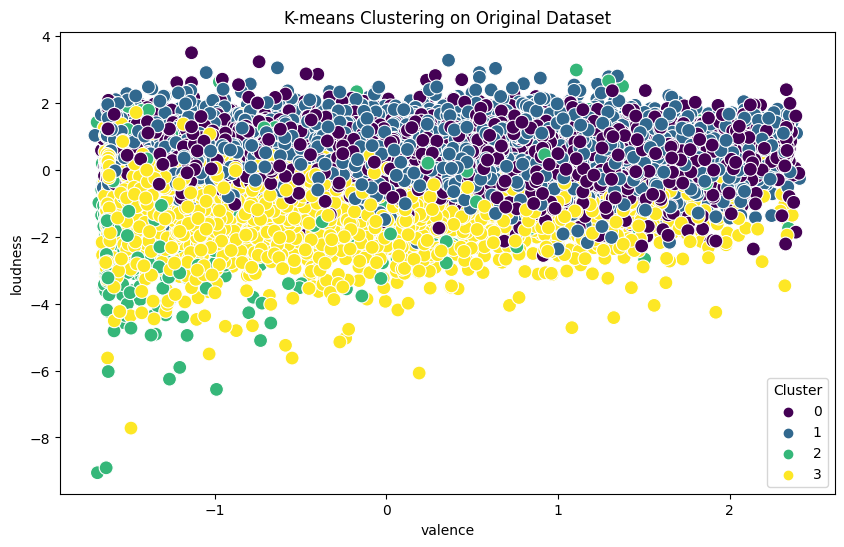

In [ ]:
#  K-Means Clustering without PCA

X = filtered_df.drop(['genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()


## Clustering with PCA

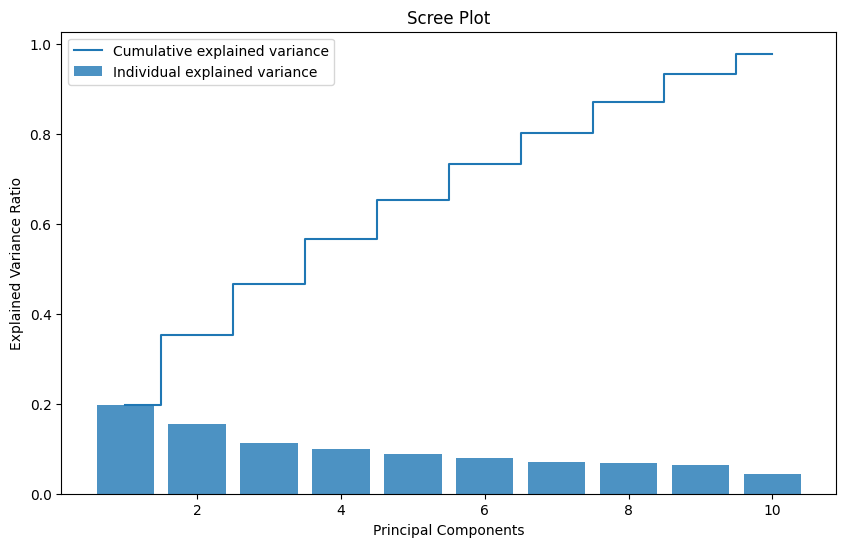

In [ ]:
# Perform PCA
n_components = 10  # Set a higher value initially
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


In [ ]:
# 4. Perform PCA
n_components = 4  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[-0.73494078, -1.1901496 , -1.25668809, -0.03860909],
       [ 1.59169592,  0.11624144, -0.33825405, -0.88627838],
       [-1.46581368,  0.81146792, -0.72329146,  1.02016378],
       ...,
       [-0.56542546, -1.03473929, -0.23710214,  0.20783954],
       [-1.17334064, -0.86639203,  0.77741616,  0.24654526],
       [-1.34619528, -0.85375207,  0.63141257, -0.22744275]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-32-54f1517c6c06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)


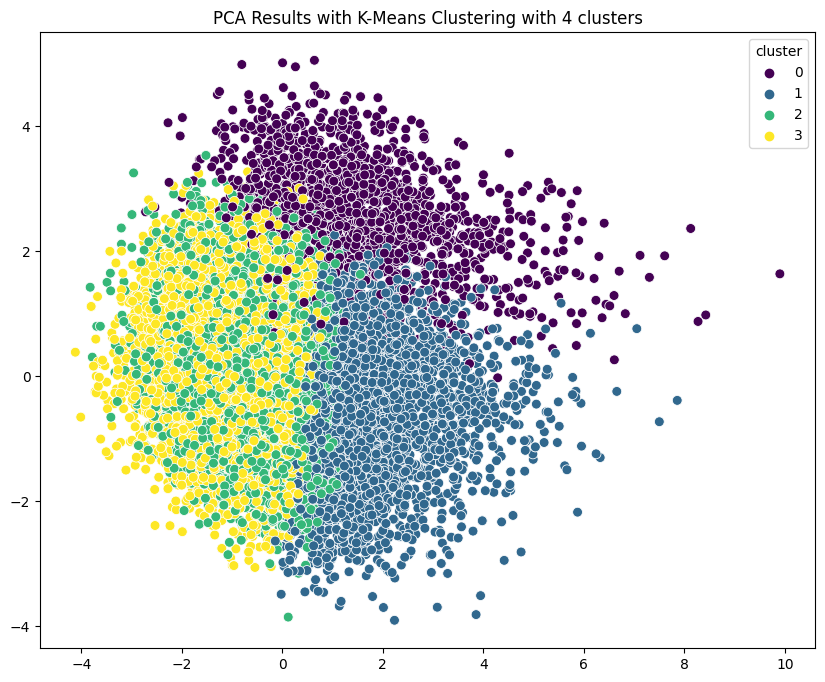

In [ ]:
# 5. K-Means Clustering on PCA Results
n_clusters = 4 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [ ]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,song_name,cluster
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,Dark Trap,Mercury: Retrograde,3
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,Dark Trap,Pathology,1
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,Dark Trap,Symbiote,3
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,Dark Trap,Venom,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,Hiphop,Daddy's Girl,3
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,Hiphop,'94,1
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,Hiphop,Born 2 Live,3
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,Hiphop,Can't Hold On,2


In [ ]:
filtered_df['cluster'].value_counts()

3    8318
2    6258
1    5150
0    1793
Name: cluster, dtype: int64

<ipython-input-46-adc5f26861b0>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
<ipython-input-46-adc5f26861b0>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
<ipython-input-46-adc5f26861b0>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
<ipython-input-46-adc5f26861b0>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)


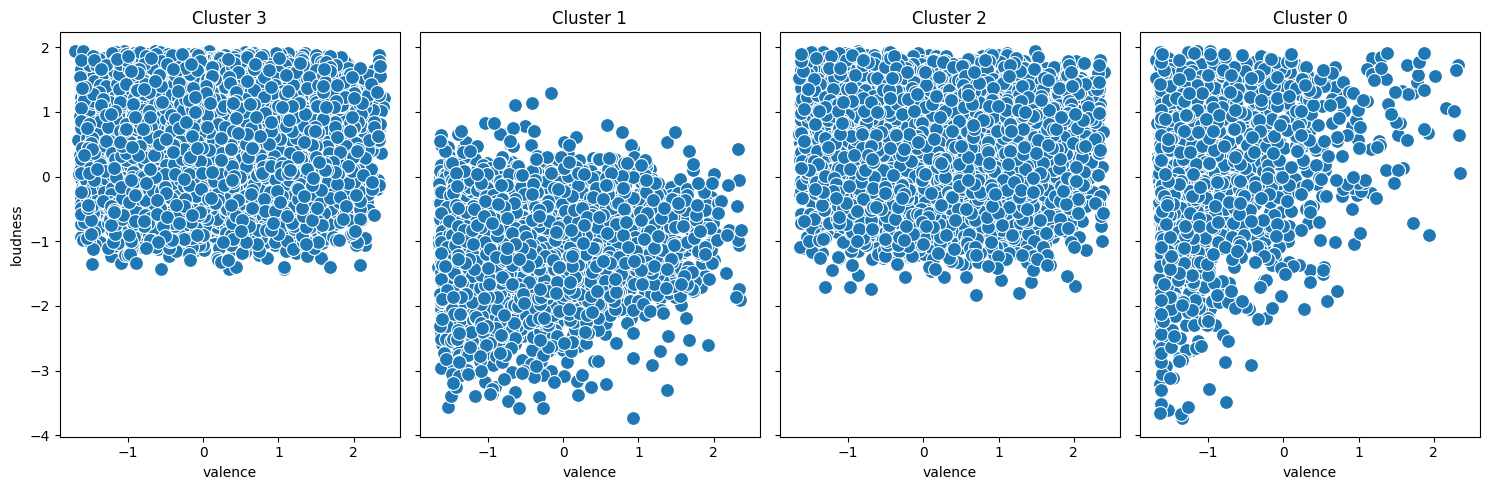

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()


In [ ]:
#Label each cluster with specific mood

filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Sad', np.nan)
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Calm', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Happy', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Angry', filtered_df_pca['mood'])

filtered_df_pca

<ipython-input-47-80f2239389d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Sad', np.nan)
<ipython-input-47-80f2239389d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Calm', filtered_df_pca['mood'])
<ipython-input-47-80f2239389d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,song_name,cluster,mood
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,0.188912,Dark Trap,Mercury: Retrograde,3,Angry
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,-1.249306,Dark Trap,Pathology,1,Calm
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,2.284719,Dark Trap,Symbiote,3,Angry
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,1.217270,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Angry
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,-0.119873,Dark Trap,Venom,3,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,0.302652,Hiphop,Daddy's Girl,3,Angry
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,0.095800,Hiphop,'94,1,Calm
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,1.121583,Hiphop,Born 2 Live,3,Angry
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,1.279459,Hiphop,Can't Hold On,2,Happy


In [117]:
#Suggest 5 random songs based on mood detected

# Detected mood
detected_mood = np.random.choice(['Happy','Sad','Angry','Calm']) # Replace this with the actual detected mood

# Filter DataFrame based on detected mood
filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]

# Select 5 random songs from the filtered DataFrame
random_songs = filtered_by_mood.sample(5)['song_name']

print("Detected mood is:", detected_mood)
print("Random songs based on detected mood:")
print(random_songs)

Detected mood is: Calm
Random songs based on detected mood:
9039          TakeCover
20330     Chill Calling
1030       I LIKE BLOOD
8315     Nxir Freestyle
19455    When U Need Me
Name: song_name, dtype: object


In [125]:
filtered_by_mood = filtered_by_mood.drop_duplicates(subset=['song_name'])


In [126]:
# Check if the user-selected song is in the filtered DataFrame

filtered_by_mood.drop_duplicates
# Display available songs for the user to choose
print("Choose a song from the following options:")
print(random_songs)

# Ask the user to select a song
selected_song = input("Enter the name of the song: ")


# Check if the user-selected song is in the filtered DataFrame
if selected_song in filtered_by_mood['song_name'].values:
    # Extract energy and valence scores for the selected song
    selected_song_features = filtered_by_mood.loc[filtered_by_mood['song_name'] == selected_song, ['energy', 'valence']].values
    print(selected_song_features)

    # Extract energy and valence scores for all songs
    all_songs_features = filtered_by_mood[['energy', 'valence']].values

    # Flatten the selected song features
    selected_song_features = selected_song_features.flatten()

    # Calculate cosine similarities
    similarities = cosine_similarity([selected_song_features], all_songs_features)

    # Convert similarities to a DataFrame
    result_df = pd.DataFrame({'song_name': filtered_by_mood['song_name'], 'similarity': similarities.flatten()})

    # Sort the DataFrame by similarity in descending order
    result_df = result_df.sort_values(by='similarity', ascending=False)

    # Reset the index
    result_df = result_df.reset_index(drop=True)

    # Exclude the selected song itself
    result_df = result_df[result_df['song_name'] != selected_song]

    # Recommend the top 3 most similar songs
    top_3_recommendations = result_df.head(3)

    print("Top 3 recommendations based on energy and valence:")
    print(top_3_recommendations[['song_name', 'similarity']])
else:
    print(f"The selected song '{selected_song}' is not found in the filtered DataFrame.")



Choose a song from the following options:
9039          TakeCover
20330     Chill Calling
1030       I LIKE BLOOD
8315     Nxir Freestyle
19455    When U Need Me
Name: song_name, dtype: object
Enter the name of the song: TakeCover
[[-1.15671231  0.39629678]]
Top 3 recommendations based on energy and valence:
                song_name  similarity
1  Treat Me Like Somebody    1.000000
2            Finesse Gawd    0.999998
3                    Lens    0.999997
